## 오토인코더 /  MNIST

### 사용 패키지

In [31]:
import time

import numpy as np

from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import json

In [6]:
# Constants & Functions
model_name = 'mnist_autoencoder'

def get_hot_idx(arr):
    return arr.index(max(arr))

def save_to_json_file(data, filename):
    with open(filename, 'w') as outfile:
        json.dump(data, outfile)
    print(filename + ' 저장완료')
    
def get_round_array(array, decimal):
    return [round(e, decimal) for e in array]

current_milli_time = lambda: int(round(time.time() * 1000))

### Data

In [4]:
# Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Model

In [24]:
encoding_dim = 32
input_img = Input(shape=(784,))

# Build encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)

# Build decoder

encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded)
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Build autoencoder
autoencoder = Model(input_img, decoded)

# Compile
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

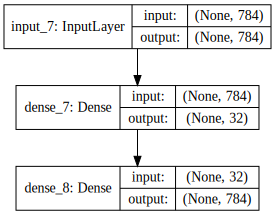

In [25]:
# 구축된 모델 구조 시각화 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

### Train Model

In [36]:
autoencoder.fit(x_train, x_train,
                epochs=3,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

model = autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 104us/step - loss: 0.1227 - val_loss: 0.1157
Epoch 2/3
60000/60000 [==============================] - 6s 97us/step - loss: 0.1134 - val_loss: 0.1084
Epoch 3/3
60000/60000 [==============================] - 6s 96us/step - loss: 0.1078 - val_loss: 0.1041


In [43]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# 인코더는 차원 축소
# 디코더는 생성 모델
# 오토인코더를 통해 생성된 데이터를 다른 예측 모델에 넣으면 성능이 올라간다. (피쳐가 잘 뽑혀서!)

[[ 7.5390687  2.1823611  3.864634  ...  2.0153692 11.495745   7.1138144]
 [ 5.4056234 11.352936   7.3416843 ...  7.525444   4.935829   5.239477 ]
 [ 7.6549163  7.8624315  0.1293841 ...  3.9194336  7.8471136  2.0626278]
 ...
 [19.97193    4.837185   4.4595575 ...  4.240254  13.202328   6.5465503]
 [20.957106   4.970554   7.682452  ...  7.10435   11.537703   5.938708 ]
 [16.125626  16.19218    5.1203785 ...  3.8474464  6.6905746  7.8813753]]

[[0.7635965  0.6415572  0.4228383  ... 0.02800225 0.71102786 0.7085836 ]
 [0.8998034  0.17687473 0.0383903  ... 0.59009236 0.03680435 0.90306735]
 [0.6959591  0.5492238  0.12194519 ... 0.4263805  0.34618315 0.6953618 ]
 ...
 [0.74966216 0.8213618  0.02734989 ... 0.0598789  0.6020483  0.74723995]
 [0.7147106  0.3466544  0.04968091 ... 0.14672004 0.17120682 0.5783283 ]
 [0.9739733  0.37981653 0.01505945 ... 0.4393459  0.28997514 0.99132454]]

[[3.72063223e-05 1.27575468e-05 2.53631788e-05 ... 1.04869476e-04
  1.45409967e-05 3.11004333e-05]
 [4.0254776